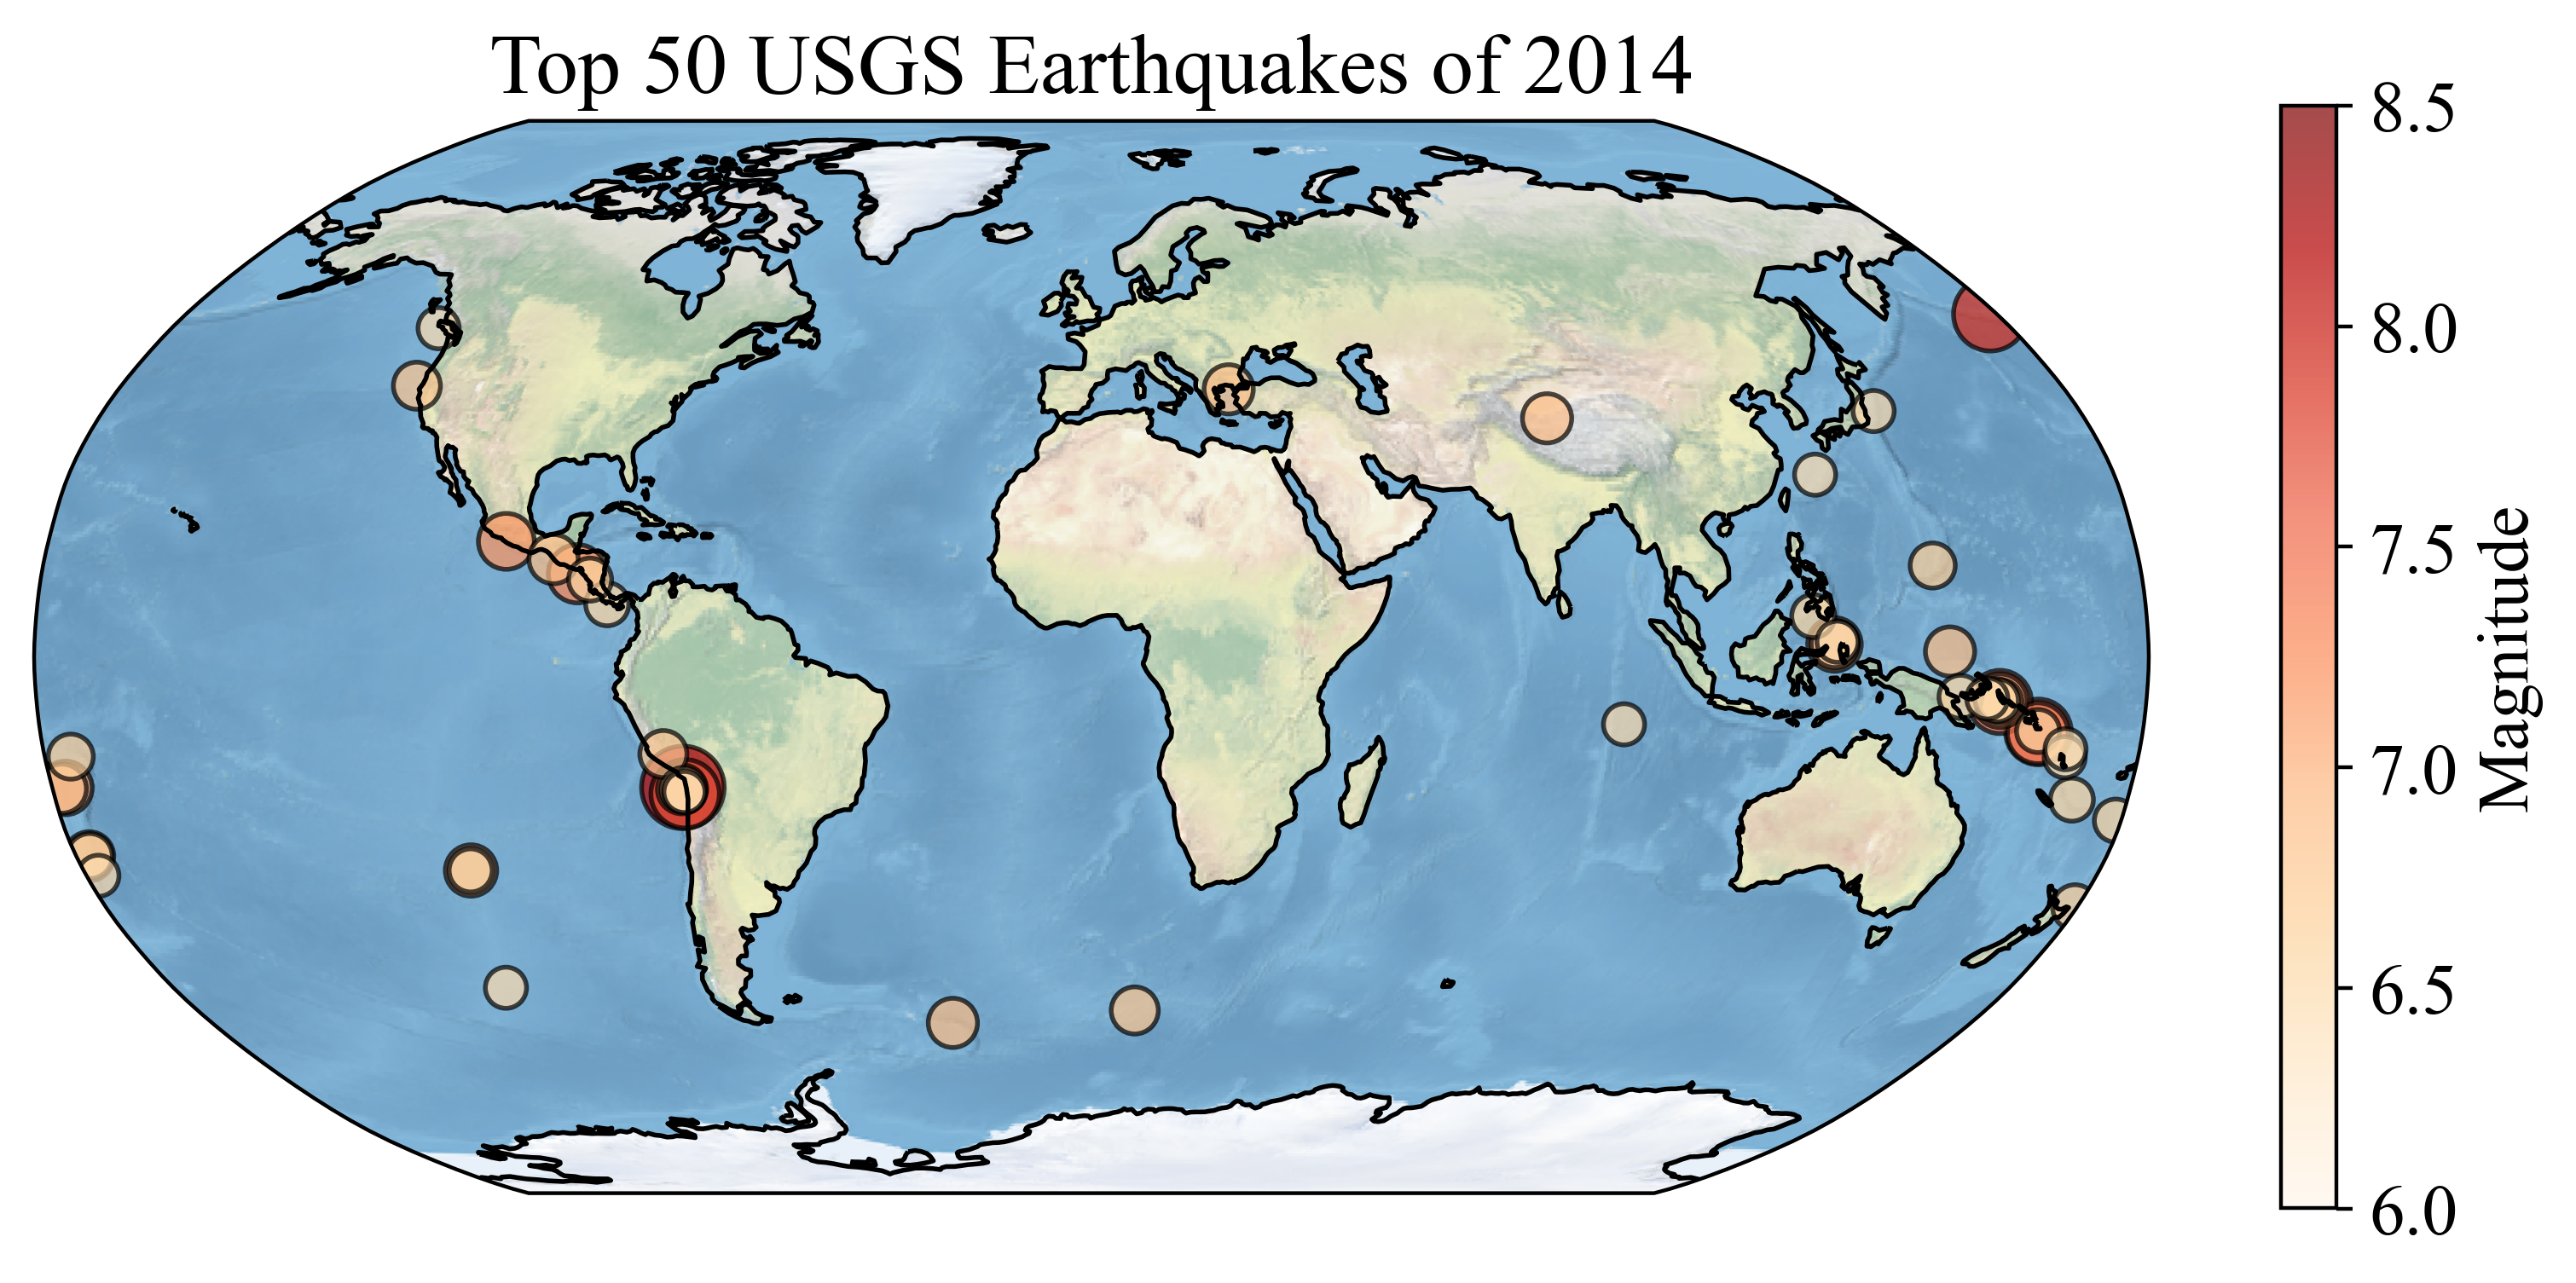

In [26]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.ticker import FuncFormatter

quake_data = pd.read_csv('usgs_earthquakes.csv')
quake_data = quake_data[quake_data['mag'] >= 0]

# Sort the data by magnitude in descending order and select the top 50
quake_data = quake_data.sort_values(by='mag', ascending=False).head(50)

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 15

fig_obj = plt.figure(figsize=(10, 6), dpi=400)

scatter_size = pow(quake_data['mag'], 6) / 1000

map_ax = plt.axes(projection=ccrs.Robinson())
map_ax.set_global()
map_ax.coastlines(resolution='110m')

map_ax.stock_img()
scatter_plot = map_ax.scatter(quake_data['longitude'], quake_data['latitude'], c=quake_data['mag'], cmap='OrRd', s=scatter_size, alpha=0.7, vmax=8.5,vmin=6, transform=ccrs.PlateCarree(),edgecolors='black')
color_bar = fig_obj.colorbar(scatter_plot, ax=map_ax, shrink=0.7, label='Magnitude')

# Format colorbar labels to one decimal place
format_func = FuncFormatter(lambda x, pos: "{:.1f}".format(x))
color_bar.ax.yaxis.set_major_formatter(format_func)

map_ax.set_title('Top 50 USGS Earthquakes of 2014')
plt.show()

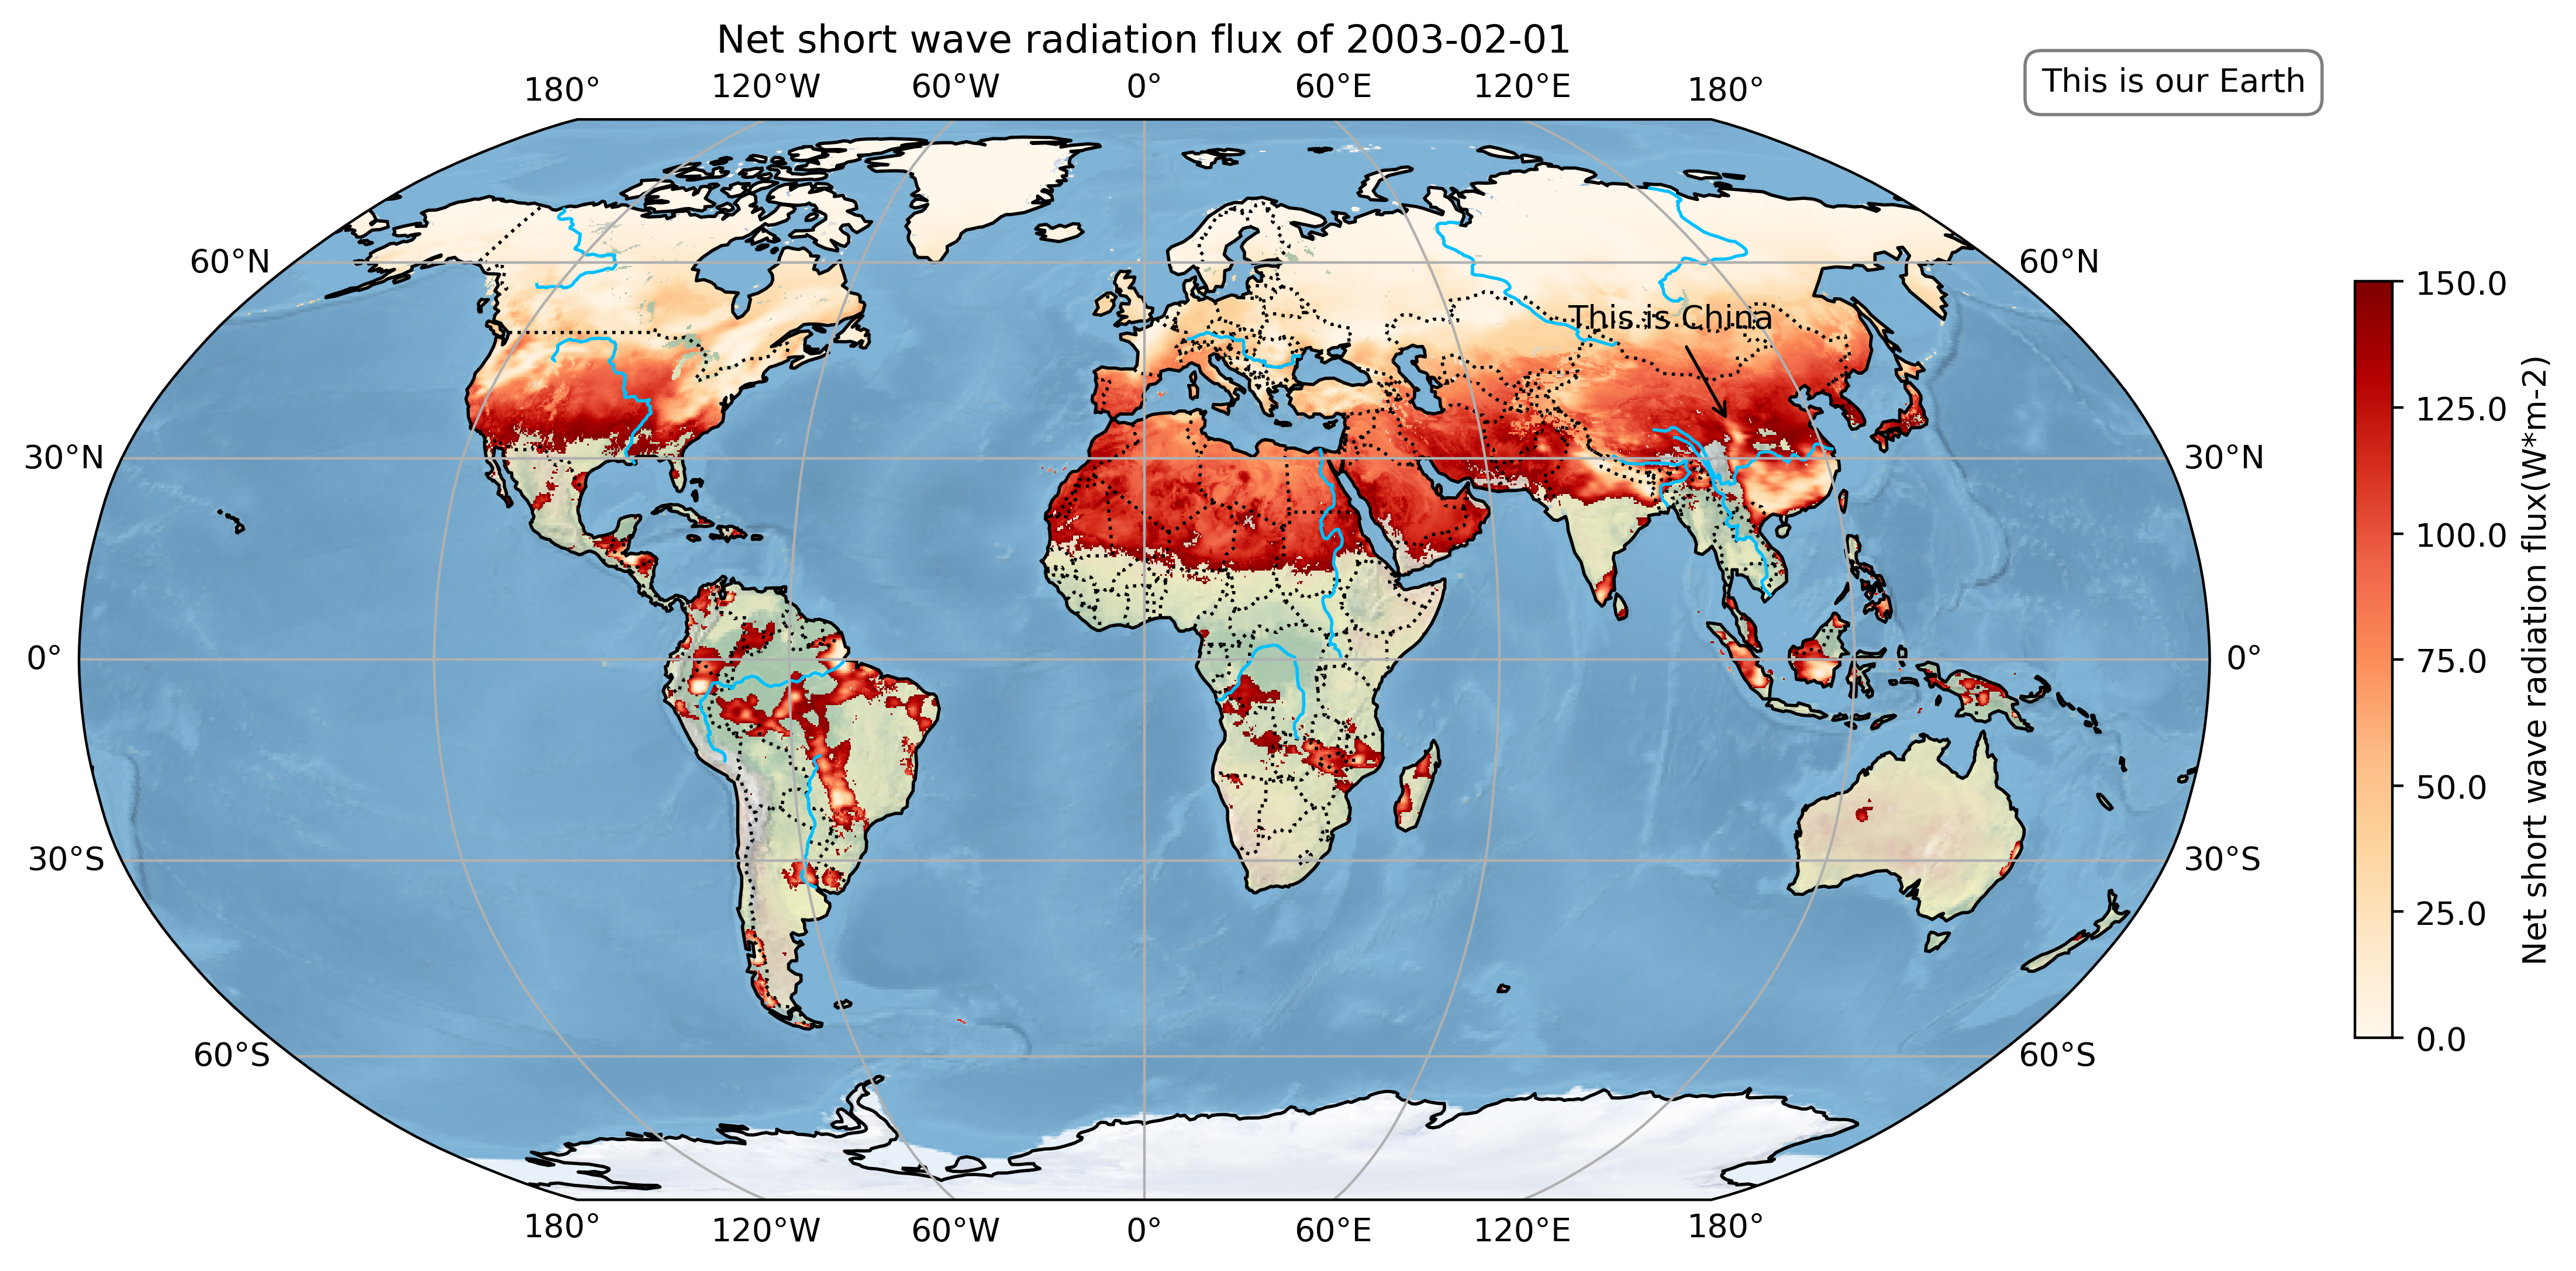

In [24]:
#2.1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mticker
import xarray as xr
import cartopy.feature as cfeature

# Open the dataset
ds = xr.open_dataset('GLDAS_CLSM025_DA1_D.A20030201.022.nc4')
# Use the latest  data
Swnet_tavg = ds.Swnet_tavg.isel(time=-1)
# Create a figure
fig_obj = plt.figure(figsize=(16, 6), dpi=400)


# Create a map and use Robinson projection
map_ax = plt.axes(projection=ccrs.Robinson())
map_ax.set_global()
map_ax.coastlines(resolution='110m')

map_ax.stock_img()

# Add a mask
mask = Swnet_tavg > 150
masked_data = np.ma.array(Swnet_tavg, mask=mask)


# Draw the data 
scatter_plot = map_ax.pcolormesh(ds['lon'][:], ds['lat'][:], masked_data, cmap='OrRd', transform=ccrs.PlateCarree())

# Add a colorbar,图中未画legend是因为本图是一张热力图
color_bar = fig_obj.colorbar(scatter_plot, ax=map_ax, shrink=0.7, label='Net short wave radiation flux(W*m-2)')

# Set colorbar ticks
color_bar.set_ticks(np.arange(0, 151, 25))

# Format colorbar labels to one decimal place
format_func = FuncFormatter(lambda x, pos: "{:.1f}".format(x))
color_bar.ax.yaxis.set_major_formatter(format_func)

# Add gridlines,x label and ticks, y label and ticks  robinson投影是圆形的，无法添加x轴及y轴，因此这里用了map_ax中自带的gridlines
gl = map_ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add features
map_ax.add_feature(cfeature.BORDERS, linestyle=':')
map_ax.add_feature(cfeature.RIVERS, edgecolor='deepskyblue')


# Add the title
map_ax.set_title('Net short wave radiation flux of 2003-02-01')

# Add an annotation at the center of China 
map_ax.annotate('This is China', xy=(105, 35), xycoords=ccrs.PlateCarree()._as_mpl_transform(map_ax), xytext=(-50, 30), 
                textcoords='offset points', arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle="->"))

# Add a text box
fig_obj.text(0.7, 0.9, 'This is our Earth', transform=fig_obj.transFigure, bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.5'))

# Show the plot
plt.show()


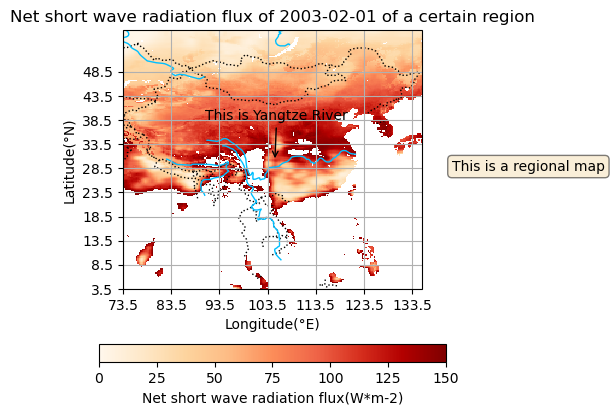

In [22]:
# Define the region of interest
lon_min, lon_max = 73.5, 135.5
lat_min, lat_max = 3.5, 53.5

# Create a regional map and use PlateCarree projection
regional_map_ax = plt.axes(projection=ccrs.PlateCarree())
regional_map_ax.set_extent([lon_min, lon_max, lat_min, lat_max])

# Draw the 'Swnet_tavg' data for the last month
scatter_plot = regional_map_ax.pcolormesh(ds['lon'][:], ds['lat'][:], masked_data, cmap='OrRd', transform=ccrs.PlateCarree())

# Add a horizontal colorbar
color_bar = fig_obj.colorbar(scatter_plot, ax=regional_map_ax, shrink=0.7, label='Net short wave radiation flux(W*m-2)', orientation='horizontal')

# Set colorbar ticks
color_bar.set_ticks(np.arange(0, 151, 25))

# Format colorbar labels to one decimal place
format_func = FuncFormatter(lambda x, pos: "{:.1f}".format(x))
color_bar.ax.yaxis.set_major_formatter(format_func)

# Add a mask
mask = Swnet_tavg > 150
masked_data = np.ma.array(Swnet_tavg, mask=mask)

# Add features
regional_map_ax.add_feature(cfeature.BORDERS, linestyle=':')
regional_map_ax.add_feature(cfeature.RIVERS, edgecolor='deepskyblue')

# Add the title
regional_map_ax.set_title('Net short wave radiation flux of 2003-02-01 of a certain region')

# Add x label and ticks
regional_map_ax.set_xlabel('Longitude(°E)')
regional_map_ax.set_xticks(np.arange(lon_min, lon_max, 10), crs=ccrs.PlateCarree())

# Add gridlines based on x label and ticks
regional_map_ax.grid(axis='x')

# Add y label and ticks
regional_map_ax.set_ylabel('Latitude(°N)')
regional_map_ax.set_yticks(np.arange(lat_min, lat_max, 5), crs=ccrs.PlateCarree())

# Add gridlines based on y label and ticks
regional_map_ax.grid(axis='y')

# Add an annotation at the center of Yangtze River
regional_map_ax.annotate('This is Yangtze River', xy=(105, 30), xycoords=ccrs.PlateCarree()._as_mpl_transform(regional_map_ax), xytext=(-50, 30), 
                textcoords='offset points', arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle="->"))
# Add a text box
regional_map_ax.text(1.1, 0.5, 'This is a regional map', transform=regional_map_ax.transAxes, fontsize=10,
                     verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Show the plot
plt.show()